In [1]:
from qimax.pc import PauliComposer

pc = PauliComposer('IZXI')
pc.to_matrix()

array([[ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [2]:
pc.col

array([ 2,  3,  0,  1,  6,  7,  4,  5, 10, 11,  8,  9, 14, 15, 12, 13])

In [3]:
pc.mat

array([ 1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1],
      dtype=int8)

In [5]:
pc2 = PauliComposer('XXI', 2)
pc2.to_matrix()

array([[0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0.]])

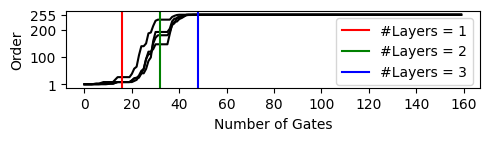

In [48]:
import qiskit
import numpy as np
num_qubits = 4
num_layers = 10
orders = [[], [], [], []]
from qimax.stabilizer import StabilizerGenerator
stb = StabilizerGenerator(num_qubits)


for _ in range(num_layers):
	for i in range(num_qubits - 1):
		stb.cx([i, i + 1])
		for ii in range(num_qubits):
			orders[ii].append(len(stb.stabilizers[ii].words.items()))
	stb.cx([num_qubits - 1, 0])
	for ii in range(num_qubits):
		orders[ii].append(len(stb.stabilizers[ii].words.items()))

	for i in range(num_qubits):
		stb.rx(np.random.rand(), i)
		for ii in range(num_qubits):
			orders[ii].append(len(stb.stabilizers[ii].words.items()))

		stb.ry(np.random.rand(), i)
		for ii in range(num_qubits):
			orders[ii].append(len(stb.stabilizers[ii].words.items()))
		stb.rz(np.random.rand(), i)
		for ii in range(num_qubits):
			orders[ii].append(len(stb.stabilizers[ii].words.items()))

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 1.5))
for ii in range(num_qubits):
	plt.plot(orders[ii], color = 'black')
plt.axvline(x = 16, color = 'r', label = '#Layers = 1')
plt.axvline(x = 32, color = 'g', label = '#Layers = 2')
plt.axvline(x = 48, color = 'b', label = '#Layers = 3')
plt.xlabel(rf'Number of Gates')
plt.ylabel(rf'Order')
plt.yticks([1,100, 200, 255])
plt.legend()
plt.tight_layout()
plt.savefig('./images/stabilizer_order.pdf')

2.607142857142857


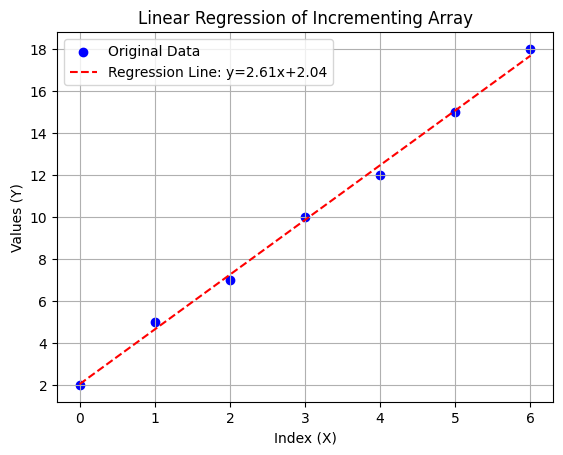

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example: Creating an incrementing array
y = np.array([2, 5, 7, 10, 12, 15, 18])  # Example array
x = np.arange(len(y))  # X values as indices

# Performing Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Generating regression line
y_pred = slope * x + intercept

# Plotting
plt.scatter(x, y, color='blue', label="Original Data")  # Scatter plot
plt.plot(x, y_pred, color='red', linestyle='--', label=f"Regression Line: y={slope:.2f}x+{intercept:.2f}")
print(slope)
plt.xlabel("Index (X)")
plt.ylabel("Values (Y)")
plt.title("Linear Regression of Incrementing Array")
plt.legend()
plt.grid()
plt.show()


In [12]:
import qiskit
import numpy as np


def cx_gate_matrix(n, control, target):
    """
    Generate the matrix representation of a CX gate for an n-qubit system.

    Args:
        n (int): Number of qubits.
        control (int): Position of the control qubit (0-based index).
        target (int): Position of the target qubit (0-based index).

    Returns:
        np.ndarray: The 2^n x 2^n matrix representation of the CX gate.
    """
    # Size of the matrix
    size = 2**n
    # Initialize the matrix as a zero matrix
    cx_matrix = np.zeros((size, size), dtype=int)

    # Iterate over all row indices
    for i in range(size):
        # Convert row index to binary representation
        binary_i = format(i, f'0{n}b')
        # Check if the control qubit is |1⟩
        if binary_i[control] == '1':
            # Flip the target qubit to get the column index
            binary_j = binary_i[:target] + ('1' if binary_i[target] == '0' else '0') + binary_i[target+1:]
            j = int(binary_j, 2)
            # Place a 1 at position (i, j)
            cx_matrix[i, j] = 1
        else:
            # If control qubit is |0⟩, the target qubit remains unchanged
            cx_matrix[i, i] = 1

    return cx_matrix

cx_gate_matrix(3, 1, 2)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [10]:
def tp(matrix_a, matrix_b):
    """
    Compute the tensor product (Kronecker product) of two matrices.

    Parameters:
    - matrix_a: The first matrix (numpy array).
    - matrix_b: The second matrix (numpy array).

    Returns:
    - A numpy array representing the tensor product of the two matrices.
    """
    return np.kron(matrix_a, matrix_b)

def cx_matrix_normal(n_qubit, ctrl_pos, target_pos):
  M = np.array([[1, 0], [0, 0]])
  P = np.array([[0, 0], [0, 1]])
  X = np.array([[0, 1], [1, 0]])
  I = np.array([[1, 0], [0, 1]])

  left_side_gate = np.array([])
  right_side_gate = np.array([])

  for i in range(n_qubit):
    if(i != ctrl_pos):
      left_side_gate = np.append(left_side_gate, np.array(["I"]))

      if(i != target_pos):
        right_side_gate = np.append(right_side_gate, np.array(["I"]))
      else:
        right_side_gate = np.append(right_side_gate, np.array(["X"]))
    else:
      left_side_gate = np.append(left_side_gate, np.array(["M"]))
      right_side_gate = np.append(right_side_gate, np.array(["P"]))

  print(left_side_gate)
  print(right_side_gate)

  left_side = np.array([])
  right_side = np.array([])

  for i in range(n_qubit):
    if(i == 0):
      if(left_side_gate[i] == "I"):
        left_side = I
      elif (left_side_gate[i] == "M"):
        left_side = M

      if(right_side_gate[i] == "I"):
        right_side = I
      elif (right_side_gate[i] == "P"):
        right_side = P
      elif (right_side_gate[i] == "X"):
        right_side = X
    else:
      if(left_side_gate[i] == "I"):
        left_side = tensor_product(left_side, I)
      elif (left_side_gate[i] == "M"):
        left_side = tensor_product(left_side, M)

      if(right_side_gate[i] == "I"):
        right_side = tensor_product(right_side, I)
      elif (right_side_gate[i] == "P"):
        right_side = tensor_product(right_side, P)
      elif (right_side_gate[i] == "X"):
        right_side = tensor_product(right_side, X)

  return left_side + right_side

cx_matrix_normal(3, 1, 2)

['I' 'M' 'I']
['I' 'P' 'X']


array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [11]:
M = np.array([[1, 0], [0, 0]])
P = np.array([[0, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
I = np.array([[1, 0], [0, 1]])

tp(tp(I, M), I) + tp(tp(I, P), X)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0]])